In [9]:
FUENTES_DIR  = '../Fuentes'
DATOS_DIR   = '../Datos/' 

import sys
sys.path.append(FUENTES_DIR)

import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection,preprocessing, metrics
from ClassPerceptron import Perceptron

In [10]:
datos = pd.read_csv(DATOS_DIR + "Lentes.csv", encoding='latin1')
print(datos.sample(10))

    Id       Edad   Prescripcion Astigmatismo  Lagrimas     Diagnostico
11  12  pre_presb  Hipermetropía           SI  Reducida  No_usar_Lentes
21  22  Presbicia         Miopía           NO  Reducida  No_usar_Lentes
23  24  Presbicia         Miopía           SI  Reducida  No_usar_Lentes
12  13  pre_presb  Hipermetropía           NO  Reducida  No_usar_Lentes
9   10  pre_presb         Miopía           SI    Normal    Lentes_Duros
20  21  Presbicia  Hipermetropía           SI    Normal  No_usar_Lentes
2    3      Joven  Hipermetropía           SI    Normal    Lentes_Duros
16  17  Presbicia         Miopía           SI    Normal    Lentes_Duros
14  15  pre_presb         Miopía           NO  Reducida  No_usar_Lentes
18  19  Presbicia  Hipermetropía           NO  Reducida  No_usar_Lentes


In [11]:
mapeo = {
    "Edad":{'Joven':1, 'pre_presb':2, 'Presbicia':3},
    "Prescripcion":{'Hipermetropía':0, 'Miopía':1},
    "Astigmatismo":{"SI":1, "NO":0},
    "Lagrimas":{"Normal":1, "Reducida":0},
    "Diagnostico":{'Lentes_Blandos':1, 'Lentes_Duros':0, 'No_usar_Lentes':0}
}
datos.replace(mapeo, inplace=True)
datos.head(10)

,Id,Edad,Prescripcion,Astigmatismo,Lagrimas,Diagnostico
0,1,1,0,0,1,1
1,2,1,1,0,1,1
2,3,1,0,1,1,0
3,4,1,1,1,1,0
4,5,1,0,0,0,0
5,6,1,0,1,0,0
6,7,1,1,0,0,0
7,8,1,1,1,0,0
8,9,2,0,0,1,1
9,10,2,1,1,1,0


In [12]:
datos.Diagnostico.unique()

array([1, 0], dtype=int64)

In [13]:
X = np.array(datos.iloc[:,:-1])
T = np.array(datos['Diagnostico']) 
print(T)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [14]:
normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)
print(X)

[[-1.66132477 -1.22474487 -1.         -1.          1.        ]
 [-1.51686175 -1.22474487  1.         -1.          1.        ]
 [-1.37239873 -1.22474487 -1.          1.          1.        ]
 [-1.2279357  -1.22474487  1.          1.          1.        ]
 [-1.08347268 -1.22474487 -1.         -1.         -1.        ]
 [-0.93900965 -1.22474487 -1.          1.         -1.        ]
 [-0.79454663 -1.22474487  1.         -1.         -1.        ]
 [-0.65008361 -1.22474487  1.          1.         -1.        ]
 [-0.50562058  0.         -1.         -1.          1.        ]
 [-0.36115756  0.          1.          1.          1.        ]
 [-0.21669454  0.          1.         -1.          1.        ]
 [-0.07223151  0.         -1.          1.         -1.        ]
 [ 0.07223151  0.         -1.         -1.         -1.        ]
 [ 0.21669454  0.         -1.          1.          1.        ]
 [ 0.36115756  0.          1.         -1.         -1.        ]
 [ 0.50562058  0.          1.          1.         -1.  

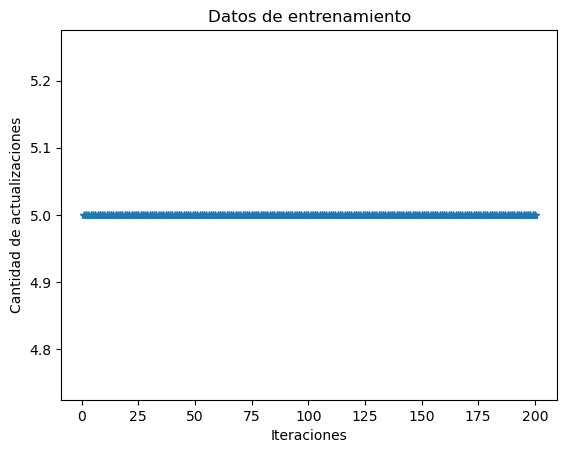

In [15]:
ppn = Perceptron(alpha=0.005, n_iter=200, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X, T)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [16]:
Y_test = 0 * len(X) #necesario inicializar el array en 0?
Y_test = ppn.predict(X)
nAciertos = np.sum(Y_test == T)
print("Dimensiones de Y_test:", Y_test.shape)
print("Dimensiones de T_test:", T.shape)
print("cantidad de tests: ", X.shape[0])
print("aciertos: ", nAciertos)
print("%% de aciertos = %.2f %%" % (100 * nAciertos / X.shape[0]))

Dimensiones de Y_test: (24,)
Dimensiones de T_test: (24,)
cantidad de tests:  24
aciertos:  19
% de aciertos = 79.17 %
